# Planeta circunbinario
### Ziglin (1975)
El paper de Ziglin dice que i y $\Omega$ están acoplados, y por lo tanto describen curvas unívocamente determinadas por el hamiltoniano (condiciones iniciales del sistema).

Fijamos $\Omega$ y generamos planetas con distintas inclinaciones para ver cómo evolucionan sus curvas de (i,$\Omega$), intentando replicar la Fig. 1 del paper.

Finalmente repetimos el gráfico pero esta vez buscando las curvas con el mismo valor de F.

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

pi = -4*np.arctan(-1)

### PARÁMETROS

In [2]:
N = 60                        # i

i_ini = 0.                    # extremos
i_fin = pi                    # en a

nodo = 75.*pi/180.

e1 = 0.5                       # e de binaria
e2 = 0.

m0 = 0.5                       # masa de estrella primaria
m1 = 0.5                       # masa de estrella secundaria
m2 = 0.                        # masa del planeta

a1 = 0.1                       # semieje entre estrellas
a2 = 0.5

# SIMULACIONES

In [3]:
p=0
for i_ind in range(N):
        
        i_i = (i_ind/(N-1))*(i_fin-i_ini) + i_ini      # e : 0.1 -> 0.3
#         i_i = 75*pi/180.
        sim = rebound.Simulation()

        sim.add(m=m0)                                           # primaria
        sim.add(m=m1,a=a1,e=e1,inc=0,l=0,Omega=0,pomega=0)    # secundaria
        
        sim.add(a=a2,e=e2,inc=i_i,Omega=nodo)                            # particula
        
        # ---------------------- integramos

        os = sim.calculate_orbits()
        sim.integrator = "whfast" 
        sim.dt = 0.05 * os[0].P  # dt = 5% del periodo de la orbita mas chica
        Nout = 300               # number of points to display
        tmax = 2*365.25          # integrar por 2 yr
        Nmoons = 2

        ecc = np.zeros((Nmoons,Nout))

        times = np.linspace(0.,tmax,Nout)
        ps = sim.particles
        elem = np.zeros((Nout,7))
        for i,time in enumerate(times):
            
            sim.integrate(time)
            os = sim.calculate_orbits()
            
            Om0 = os[1].Omega*180/pi
#             Inc0 = os[1].inc*180/pi
            
            if Om0 < 0:
                Om0 = Om0 + 180                
            
            elem[i] = [time/365.25,os[1].a,os[1].e,os[1].inc*180/pi,os[1].l*180/pi,os[1].omega*180/pi,Om0]
            
            if np.isnan(os[1].e) == True:
                break
        
        p = p+1                                     #
        perc = np.round((p/(N))*100,decimals=1)     #  porcentaje de progreso del programa
        print(str(perc)+'%',end='\r')               #
        
        sim.save("checkpoint.bin")

#         f.append([a_ind,e_ind,np.max(ecc[1]),a_i,e_i])
        open('inc'+str(i_ind)+'.txt', 'w').close()
        np.savetxt('inc'+str(i_ind)+'.txt',elem)

### GRÁFICOS
Los puntos rojos son condiciones iniciales

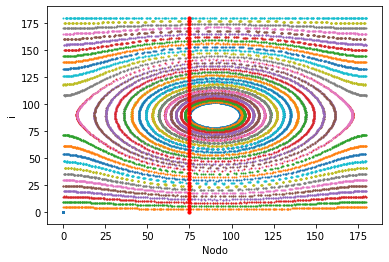

In [17]:
for i in range(N):
    i_l = np.genfromtxt('inc'+str(i)+'.txt',usecols=[3])
#     i_l1,i_l2 = np.split(i_l,2)
    nodo_l = np.genfromtxt('inc'+str(i)+'.txt',usecols=[6])
    t_l = np.genfromtxt('inc'+str(i)+'.txt',usecols=[0])
#     W_l1,W_l2 = np.split(W_l,2)
#     plt.scatter(W_l1,i_l1)
#     plt.scatter(W_l2,i_l2)
    plt.scatter(nodo_l,i_l,s=1)
#     plt.show()
for i_ind in range(N):
#         i_i = 75
        i_i = 180*((i_ind/(N-1))*(i_fin-i_ini) + i_ini)/pi 
        plt.scatter(nodo*180/pi,i_i,s=10,color='red')
    
# plt.xlim(0,180)
# plt.ylim(0,180)

plt.xlabel('Nodo')
plt.ylabel('i')

plt.show()

# CURVAS DE IGUAL HAMILTONIANO

In [5]:
def W(a,e,i,nodo,a1,e1,m0,m1):
        G = 3.963644418946e-14        # AU^3 Msol^-1 s^-2
        mu1 = G*m0
        mu2 = G*m1
        mu = mu1 + mu2
        W_f = mu1*mu2*(a1**2)*(3*(1 - e1**2)*(2 - (np.sin(i)**2)) + 15*(e1**2)*(1 - (np.sin(i)**2)*(np.sin(nodo)**2)) - 6*(e1**2) - 4)/(8*mu*(a**3)*((1 - e**2)**(5/2)))
        return(W_f)

In [6]:
N_W = 150     # resolución de la grilla en cada eje

i_l2 = np.linspace(0*pi/180,180*pi/180,N_W)
nodo_l2 = np.linspace(0*pi/180,180*pi/180,N_W)

In [7]:
W_l = np.zeros((N_W,N_W))
for k,i_k in enumerate(i_l2):
    for j,nodo_j in enumerate(nodo_l2):
        W_l[k,j] = W(a2,e2,i_k,nodo_j,a1,e1,m0,m1)

Text(0, 0.5, 'i')

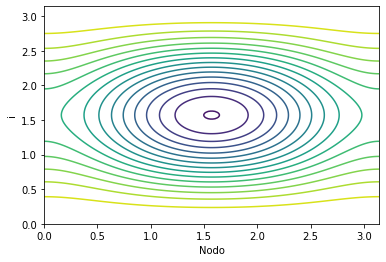

In [8]:
plt.contour(nodo_l2,i_l2,W_l,15)
plt.xlabel('Nodo')
plt.ylabel('i')

# Combinado

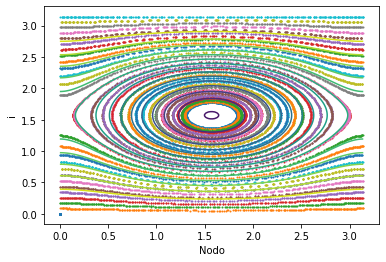

In [16]:
for i in range(N):
    i_l = np.genfromtxt('inc'+str(i)+'.txt',usecols=[3])
    nodo_l = np.genfromtxt('inc'+str(i)+'.txt',usecols=[6])
    t_l = np.genfromtxt('inc'+str(i)+'.txt',usecols=[0])
    plt.scatter(nodo_l*pi/180,i_l*pi/180,s=1)

    
plt.contour(nodo_l2,i_l2,W_l,14)

plt.xlabel('Nodo')
plt.ylabel('i')

plt.show()